In [1]:
# Load packages
from citipy import citipy
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# File to Load Uber Raw Data from Sep 2014 (1 million records) and Create a dictionary of raw data
file_to_load = "Resources/uber-raw-data-sep14.csv"

# Read UBER Data File and store into Pandas data frame. This data Frame will carry million records
uber_data = pd.read_csv(file_to_load)
uber_data = pd.DataFrame(uber_data, columns= ["Date/Time","Lat","Lon"])
uber_data.head()

,Date/Time,Lat,Lon
0,9/1/2014 0:01:00,40.2201,-74.0021
1,9/1/2014 0:01:00,40.7500,-74.0027
2,9/1/2014 0:03:00,40.7559,-73.9864
3,9/1/2014 0:06:00,40.7450,-73.9889
4,9/1/2014 0:11:00,40.8145,-73.9444


In [3]:
#Convert The Date time column into Date, Time and Hour Column for detailed analysis
uber_data["Times"] = ""
tripDate = pd.to_datetime(uber_data["Date/Time"])
uber_data = uber_data.assign(Times = tripDate)
uber_data["Hour"] = uber_data.Times.dt.hour # Split of Hour from Datetime Stamp
uber_data["Date"] = uber_data.Times.dt.date # Split of Date from Datetime Stamp
uber_data["Times"] = uber_data.Times.dt.time # Split of Time from Datetime Stamp
uber_data.head()

,Date/Time,Lat,Lon,Times,Hour,Date
0,9/1/2014 0:01:00,40.2201,-74.0021,00:01:00,0,2014-09-01
1,9/1/2014 0:01:00,40.7500,-74.0027,00:01:00,0,2014-09-01
2,9/1/2014 0:03:00,40.7559,-73.9864,00:03:00,0,2014-09-01
3,9/1/2014 0:06:00,40.7450,-73.9889,00:06:00,0,2014-09-01
4,9/1/2014 0:11:00,40.8145,-73.9444,00:11:00,0,2014-09-01


In [4]:
# Calculating the City Name using the latitude and Longitude using CitiPy package
# Performance optimisation was perfromed to process 1mn records faster
uber_data["CityName"] = ""
for row in uber_data.itertuples():     
     uber_data["CityName"][row.Index] = citipy.nearest_city(row.Lat,row.Lon).city_name    

uber_data.head()


C:\Users\aga641\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date/Time,Lat,Lon,Times,Hour,Date,CityName
0,9/1/2014 0:01:00,40.2201,-74.0021,00:01:00,0,2014-09-01,asbury park
1,9/1/2014 0:01:00,40.7500,-74.0027,00:01:00,0,2014-09-01,weehawken
2,9/1/2014 0:03:00,40.7559,-73.9864,00:03:00,0,2014-09-01,weehawken
3,9/1/2014 0:06:00,40.7450,-73.9889,00:06:00,0,2014-09-01,new york
4,9/1/2014 0:11:00,40.8145,-73.9444,00:11:00,0,2014-09-01,edgewater


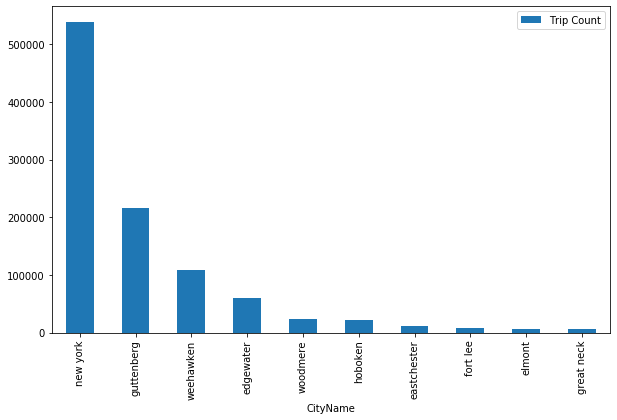

In [11]:
#Bar Plotting for Top 10 City for Rush City Analysis by count of trips in the city
uberTripsByCity = uber_data.groupby(["CityName"])["CityName"].count()
uberSummaryTrips2DF = pd.DataFrame({ "Trip Count": uberTripsByCity })
uberSummaryTrips2DF = uberSummaryTrips2DF.sort_values(by=["Trip Count"], ascending = False)
uberSummaryTrips2DF = uberSummaryTrips2DF.reset_index()
uberSummaryTrips2DF = uberSummaryTrips2DF.head(10)
uberSummaryTrips2DF.plot("CityName", "Trip Count",kind="bar",figsize=(10,6))
plt.show()

In [6]:
#This code is to derive trip analysis for all cities of UBER Data processed 

uberTripsByTime = uber_data.groupby("Hour")["Hour"].count()
rush_hour_df = pd.DataFrame({ "Trip Count": uberTripsByTime })
rush_hour_df = rush_hour_df.sort_values(by=["Trip Count"], ascending = False)
rush_hour_df = rush_hour_df.reset_index()
rush_hour_df.head(10)

,Hour,Trip Count
0,18,75040
1,17,73373
2,19,69660
3,16,68224
4,20,63988
5,15,61219
6,21,60606
7,14,52643
8,22,51817
9,13,45042


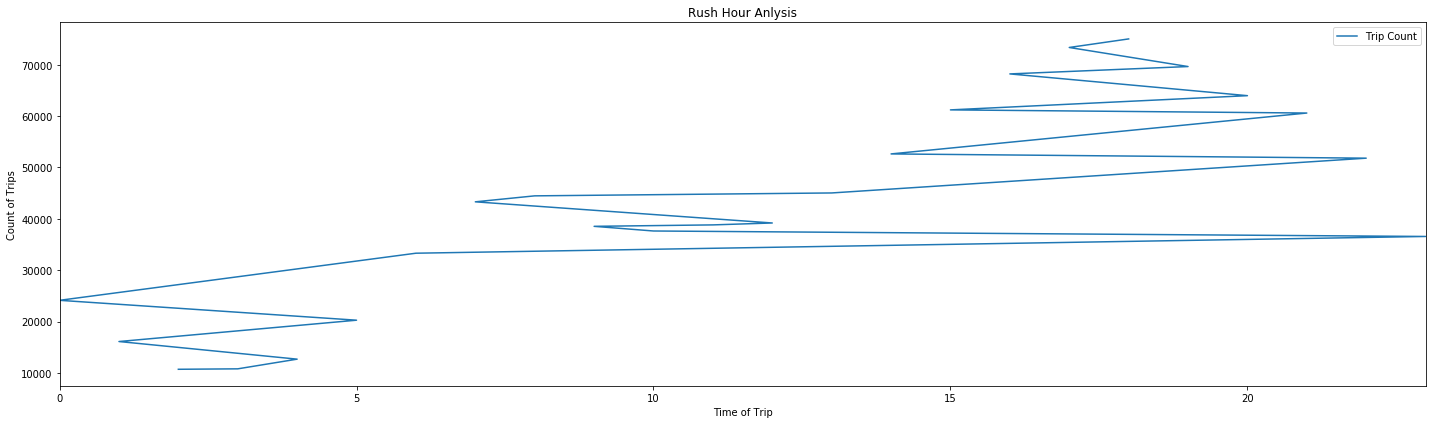

In [7]:
# Generate a bar plot showing number of data points for each Hour of Day using pandas to perfrom Rush Hour Analysis
rush_hour_df.plot("Hour", "Trip Count",kind="line",figsize=(20,6))
# Set a title for the chart
plt.title(f"Rush Hour Anlysis")
plt.xlabel("Time of Trip")
plt.ylabel("Count of Trips")
plt.tight_layout()

plt.show()



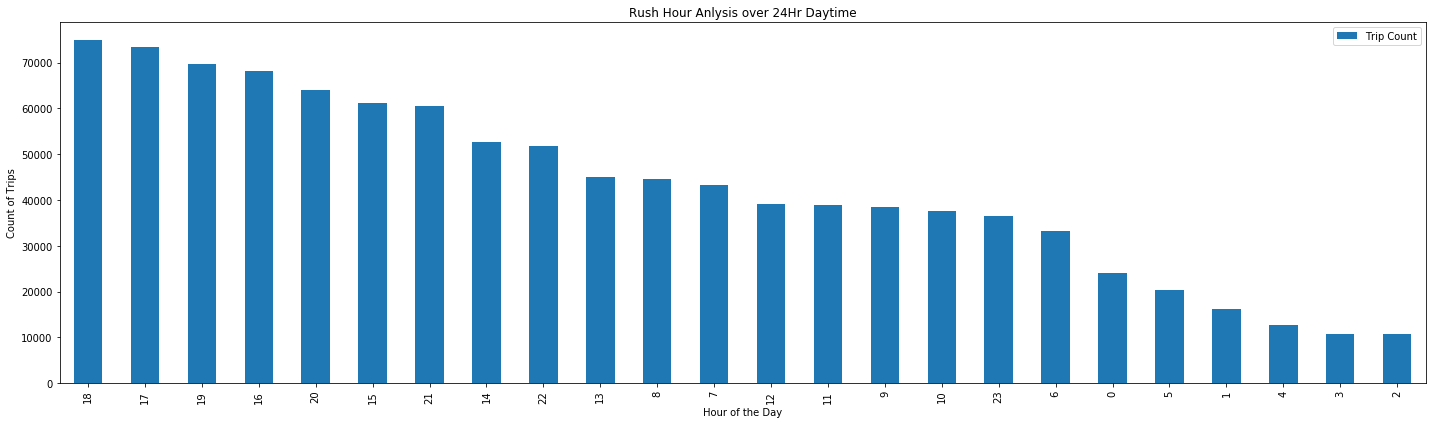

In [8]:
# Generate a bar plot to show Peak Rush Hour to Lowest Rush Hour using pandas
rush_hour_df.plot("Hour", "Trip Count",kind="bar",figsize=(20,6))
# Set a title for the chart
plt.title(f"Rush Hour Anlysis over 24Hr Daytime")
plt.xlabel("Hour of the Day")
plt.ylabel("Count of Trips")
plt.tight_layout()

plt.show()


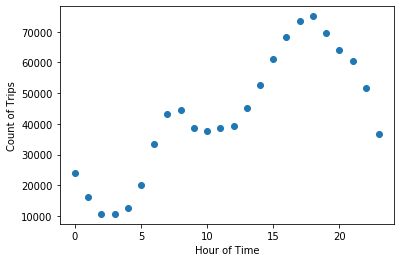

In [9]:
# Generate a scatter plot to show count of trips over 24 hour window

plt.scatter(rush_hour_df['Hour'],rush_hour_df['Trip Count'])
plt.xlabel('Hour of Time')
plt.ylabel('Count of Trips')
plt.show()

The correlation coefficient between both factors is 0.81
The regression values for each hour of the day as part of linear regression model is:
0     57903.665652
1     55586.024783
2     60221.306522
3     53268.383913
4     62538.947391
5     50950.743043
6     64856.588261
7     48633.102174
8     67174.229130
9     46315.461304
10    34727.256957
11    32409.616087
12    43997.820435
13    41680.179565
14    37044.897826
15    39362.538696
16    69491.870000
17    30091.975217
18    16186.130000
19    27774.334348
20    18503.770870
21    25456.693478
22    23139.052609
23    20821.411739
Name: Hour, dtype: float64
The r-squared is: 0.8120499898440173


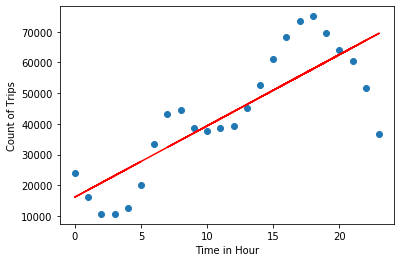

In [10]:
# Calculate the correlation coefficient and linear regression model for Hour of day time 
# and Trip Count for the UBER Data
# Coorelation was identified to be pretty good with 0.8 coorelation coefficient.

Hour_Time = rush_hour_df['Hour']
Trip_Count = rush_hour_df['Trip Count']
correlation = st.pearsonr(Hour_Time,Trip_Count)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

# Calculate the linear regression model for for Hour of day time and Trip Count for the UBER Data
x_values = rush_hour_df['Hour']
y_values = rush_hour_df['Trip Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print("The regression values for each hour of the day as part of linear regression model is:")
print(regress_values)

# Plot the linear regression model on top of the previous scatter plot.
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Time in Hour')
plt.ylabel('Count of Trips')
print(f"The r-squared is: {rvalue}")
plt.show()